# **Occupancy Detection - by Arya Adhy**

![banner](https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/assets/banner.png)

## **Data Preparation**

### **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

### **Read Datasets**

In [2]:
datatest_1 = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatest.csv")
datatest_2 = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatest2.csv")
datatraining = pd.read_csv("https://raw.githubusercontent.com/aryaadhy/Occupancy_Detection_FINPRO/main/dataset/datatraining.csv")

### **Data Cleaning**

In [3]:
# Duplicate, missing values, and data types summary function
def missing_values_summary(df, name):
    print(f'Duplicate values {name}:', df.duplicated().sum())
    msv = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
    msv['Percentage'] = (msv['Total Null Values']/df.shape[0])*100
    msv["Data Type"] = [df[col].dtype for col in df.columns]
    msv.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
    return msv.style.background_gradient(cmap='Blues')

In [4]:
missing_values_summary(datatest_1, "datatest_1")

Duplicate values datatest_1: 2


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [5]:
missing_values_summary(datatest_2, "datatest_2")

Duplicate values datatest_2: 27


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [6]:
missing_values_summary(datatraining, "datatraining")

Duplicate values datatraining: 25


,Total Null Values,Percentage,Data Type
date,0,0.000000,object
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


**Observation :**<br>
1. Masing - masing *`Datatest_1`, `Datatest_2`, `Datatraining`* memiliki duplicate values berturut-turut *`2`,`27`,`25`*
2. Ketiga dataset tidak memiliki Missing values
3. Ketiga dataset memiliki tipe data yang sama pada masing-masing feature seperti dibawah ini:

List of Column Types:
- `date` : object
- `Temperature` : float
- `Humidity` : float
- `Light` : float
- `CO2` : float
- `HumidityRatio` : float
- `Occupancy` : int

**To Do**
1. Melakukan *cleaning duplicates values*
2. Melakukan *manipulasi tipe data*


In [7]:
# 1. Remove duplicates values and keep the first occurrence
for df in [datatest_1, datatest_2, datatraining]:
    df.drop_duplicates(keep='first', inplace=True)

# Verify duplicates removal
for df, name in zip([datatest_1, datatest_2, datatraining], 
                    ["datatest_1", "datatest_2", "datatraining"]):
    print(f'Duplicate values after removal {name}:', df.duplicated().sum())

Duplicate values after removal datatest_1: 0
Duplicate values after removal datatest_2: 0
Duplicate values after removal datatraining: 0


In [8]:
# 2. Change data type of "date" column to datetime format
for df in [datatest_1, datatest_2, datatraining]:
    df['date'] = pd.to_datetime(df['date'])

# Verify data type change
for df, name in zip([datatest_1, datatest_2, datatraining], 
                    ["datatest_1", "datatest_2", "datatraining"]):
    print(f'Data type of "date" column in {name}:', df['date'].dtype)

Data type of "date" column in datatest_1: datetime64[ns]
Data type of "date" column in datatest_2: datetime64[ns]
Data type of "date" column in datatraining: datetime64[ns]


**Final Check After Cleaning Missing Values, Duplicate Values and Data Type**

In [9]:
missing_values_summary(datatest_1, "datatest_1 after cleaning")

Duplicate values datatest_1 after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [10]:
missing_values_summary(datatest_2, "datatest_2 after cleaning")

Duplicate values datatest_2 after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


In [11]:
missing_values_summary(datatraining, "datatraining after cleaning")

Duplicate values datatraining after cleaning: 0


,Total Null Values,Percentage,Data Type
date,0,0.000000,datetime64[ns]
Temperature,0,0.000000,float64
Humidity,0,0.000000,float64
Light,0,0.000000,float64
CO2,0,0.000000,float64
HumidityRatio,0,0.000000,float64
Occupancy,0,0.000000,int64


### **Statistic summary** 

In [12]:
datasets = {
    "datatest_1": datatest_1,
    "datatest_2": datatest_2,
    "datatraining": datatraining
}

def compare_describe(datasets):
    return pd.concat(
        {name: df.describe().T for name, df in datasets.items()}
    )

compare_describe(datasets)

count                           mean  \
datatest_1   date             2663  2015-02-03 12:31:06.150957568   
             Temperature    2663.0                      21.434619   
             Humidity       2663.0                      25.356159   
             Light          2663.0                     193.372676   
             CO2            2663.0                     718.117252   
             HumidityRatio  2663.0                       0.004028   
             Occupancy      2663.0                       0.365002   
datatest_2   date             9725  2015-02-15 00:00:12.481233664   
             Temperature    9725.0                      21.003622   
             Humidity       9725.0                       29.88527   
             Light          9725.0                     123.402925   
             CO2            9725.0                     753.226073   
             HumidityRatio  9725.0                       0.004588   
             Occupancy      9725.0                       0.210694   
datatraining date             8118  2015-02-07 13:41:22.150776064   
             Temperature    8118.0                      20.620773   
             Humidity       8118.0                      25.731275   
             Light          8118.0                     119.884487   
             CO2            8118.0                     607.017807   
             HumidityRatio  8118.0                       0.003863   
             Occupancy      8118.0                       0.212983   

                                            min                  25%  \
datatest_1   date           2015-02-02 14:19:00  2015-02-03 01:24:30   
             Temperature                   20.2                20.65   
             Humidity                      22.1             23.27875   
             Light                          0.0                  0.0   
             CO2                          427.5                466.0   
             HumidityRatio             0.003303             0.003532   
             Occupancy                      0.0                  0.0   
datatest_2   date           2015-02-11 14:48:00  2015-02-13 07:19:00   
             Temperature                   19.5                20.29   
             Humidity                    21.865            26.626667   
             Light                          0.0                  0.0   
             CO2                     484.666667                542.5   
             HumidityRatio             0.003275             0.004196   
             Occupancy                      0.0                  0.0   
datatraining date           2015-02-04 17:51:00  2015-02-06 03:46:15   
             Temperature                   19.0              19.7225   
             Humidity                    16.745                 20.2   
             Light                          0.0                  0.0   
             CO2                         412.75                439.0   
             HumidityRatio             0.002674             0.003078   
             Occupancy                      0.0                  0.0   

                                            50%                  75%  \
datatest_1   date           2015-02-03 12:32:00  2015-02-03 23:37:30   
             Temperature                  20.89            22.360833   
             Humidity                      25.0            26.863333   
             Light                          0.0                442.5   
             CO2                         580.75           956.541667   
             HumidityRatio             0.003815             0.004532   
             Occupancy                      0.0                  1.0   
datatest_2   date           2015-02-15 00:00:00  2015-02-16 16:40:00   
             Temperature                  20.79            21.533333   
             Humidity                      30.2                 32.7   
             Light                          0.0                210.0   
             CO2                          639.0              

**Observation**
1. Dari variabel `date` kita ketahui bahwa data direkam pada timeline yang berbeda dengan urutan `datatest_1` - `datatraining` - `datatest_2` sehigga dapat meningkatkan confidence validasi dari hasil evaluasi model. dan karena `date` bukan merupakan tipe data numerik sehingga menghasilkan NaN Values di kolom Standar Deviasi.
2. Variabel `Light` memiliki distribusi sangat skewed dengan median 0, yang berpotensi menjadi strong predictor terhadap `Occupancy`.
3. Dataset menunjukkan class imbalance dimana proporsi `Occupied` hanya sekitar `20–35%`, sehingga evaluasi model tidak dapat hanya mengandalkan `accuracy`.
4. Distribusi `CO2` menunjukkan peningkatan mean pada data test dibanding training, mengindikasikan kemungkinan adanya temporal distribution shift.

## **Explorator Data Analysis (EDA)**

### **Uni-Variate Analysis**

**Individual Box Plot and Violin Plot**

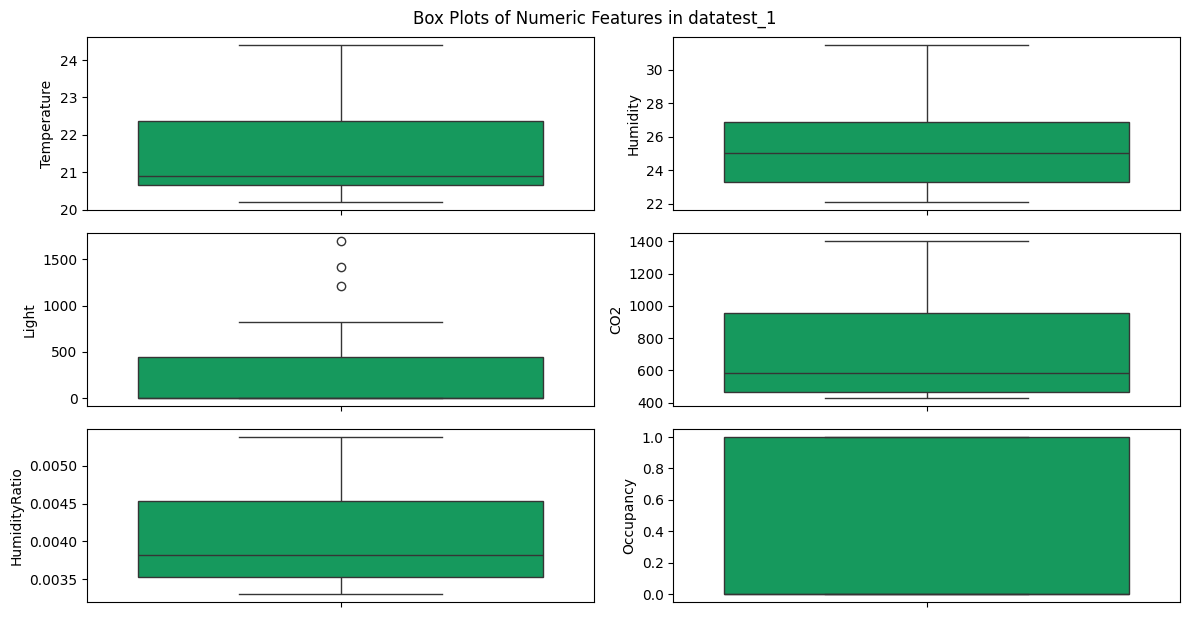

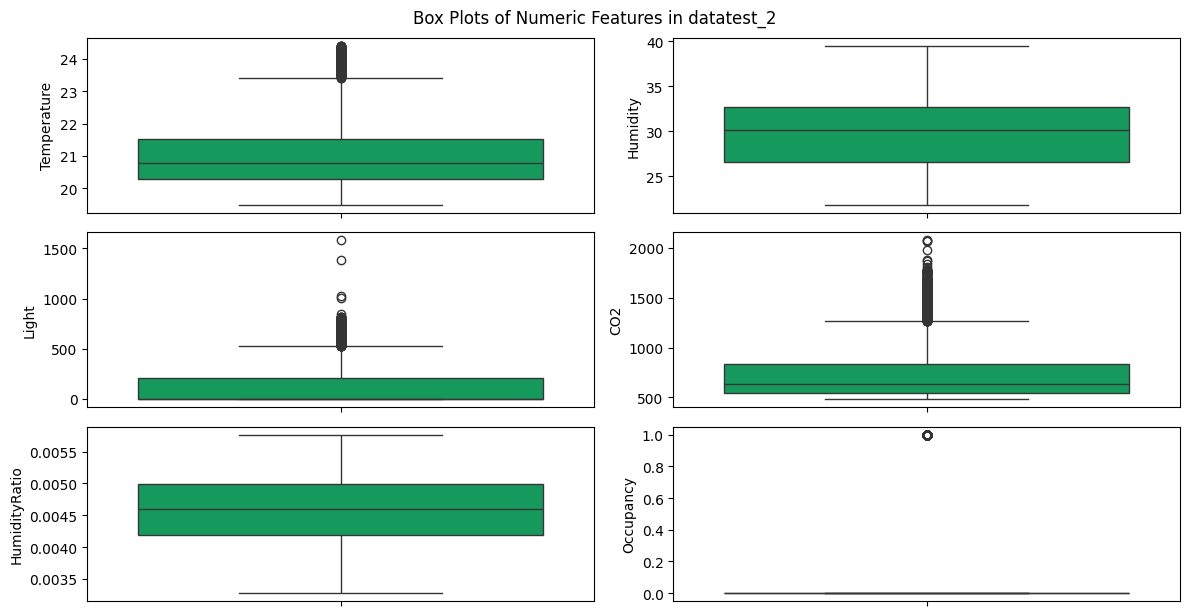

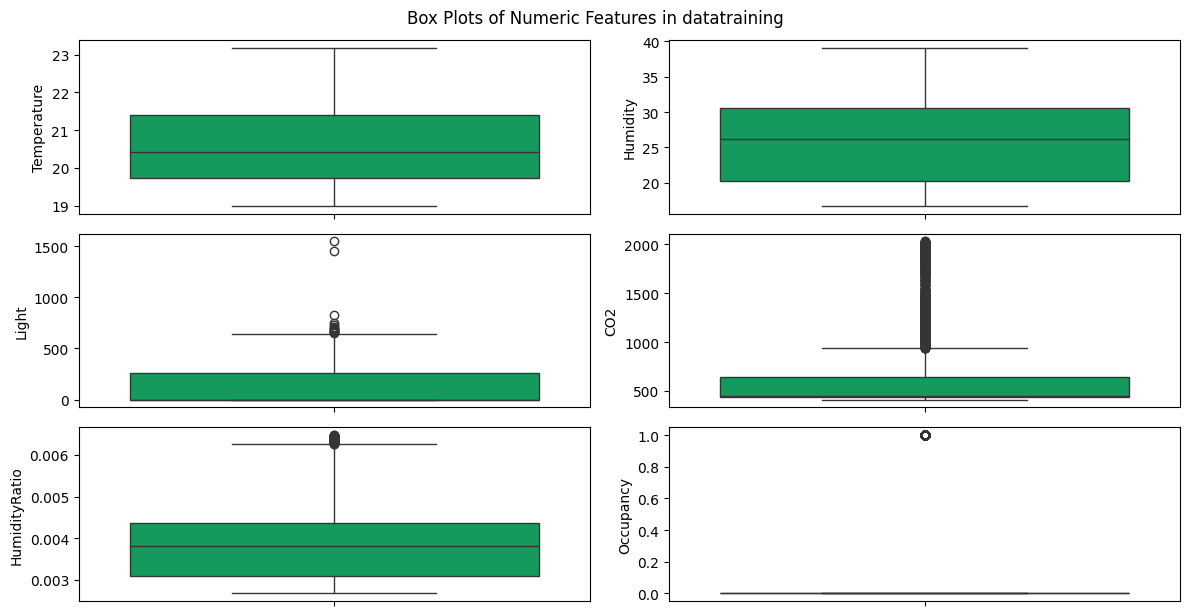

In [13]:
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    plt.figure(figsize=(12, 6))
    n = 3  # number of columns in subplot grid
    for i in range(0, len(numeric_cols)):
        plt.subplot(n, math.ceil(len(numeric_cols)/n), i+1)
        sns.boxplot(y=df[numeric_cols[i]], color='#00af5f', orient='v')
        plt.tight_layout()
    plt.suptitle(f'Box Plots of Numeric Features in {name}', y=1.02)
    plt.show()

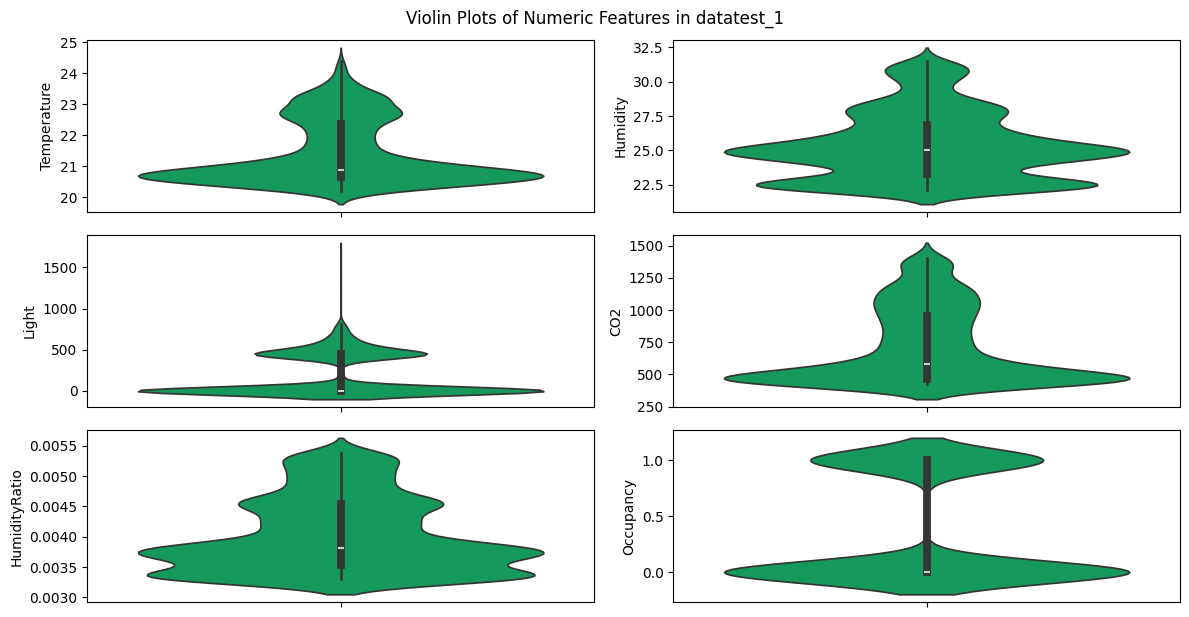

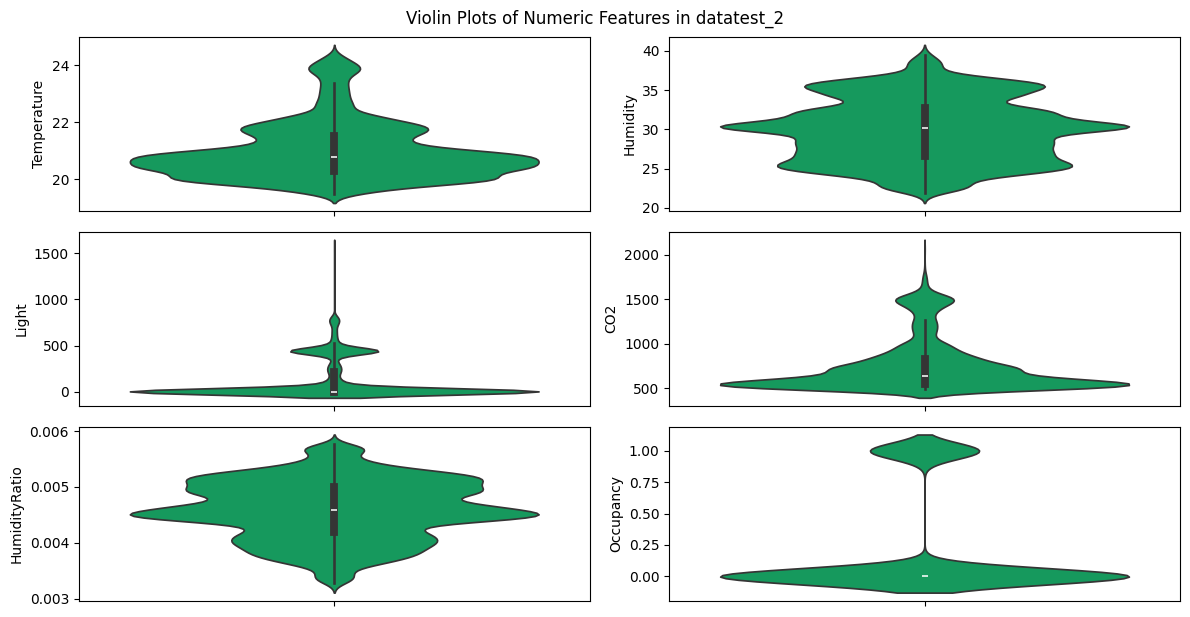

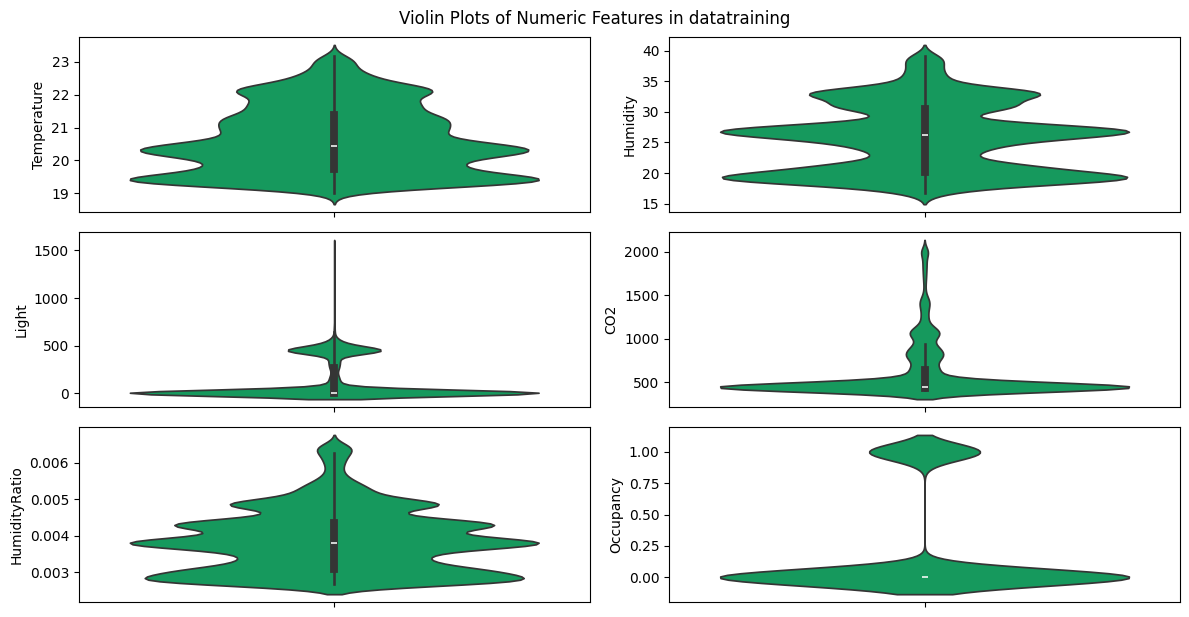

In [14]:
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    plt.figure(figsize=(12, 6))
    n = 3  # number of columns in subplot grid
    for i in range(0, len(numeric_cols)):
        plt.subplot(n, math.ceil(len(numeric_cols)/n), i+1)
        sns.violinplot(y=df[numeric_cols[i]], color='#00af5f', orient='v')
        plt.tight_layout()
    plt.suptitle(f'Violin Plots of Numeric Features in {name}', y=1.02)
    plt.show()

**Checking Outliers**

In [15]:
datasets = {
    "Datatest_1": datatest_1,
    "Datatest_2": datatest_2,
    "Datatraining": datatraining
}

for name, df in datasets.items():
    
    print(f"\n===== {name} =====")
    print(f'Jumlah baris: {len(df)}')
    
    numeric_cols = df.select_dtypes(include='number').columns
    summary = []
    
    all_mask = pd.Series(True, index=df.index)
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        mask = df[col].between(lower, upper)
        
        summary.append({
            "Column Name": col,
            "is Outlier": (~mask).any(),
            "Lower Limit": lower,
            "Upper Limit": upper,
            "Outlier": (~mask).sum(),
            "No Outlier": mask.sum()
        })
        
        all_mask &= mask
    
    # Untuk menampilkan baris yang merupakan outlier
    # outlier_rows = df.loc[~all_mask] 
    
    # if len(outlier_rows) > 0:
    #     print("\nOutlier Rows (Combined):")
    #     display(outlier_rows)
    # else:
    #     print("Tidak ada baris outlier.")
    
    display(pd.DataFrame(summary))


===== Datatest_1 =====
Jumlah baris: 2663


,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Temperature,False,18.083750,24.927083,0,2663
1,Humidity,False,17.901875,32.240208,0,2663
2,Light,True,-663.750000,1106.250000,3,2660
3,CO2,False,-269.812500,1692.354167,0,2663
4,HumidityRatio,False,0.002033,0.006031,0,2663
5,Occupancy,False,-1.500000,2.500000,0,2663



===== Datatest_2 =====
Jumlah baris: 9725


,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Temperature,True,18.425000,23.398333,479,9246
1,Humidity,False,17.516667,41.810000,0,9725
2,Light,True,-315.000000,525.000000,424,9301
3,CO2,True,109.000000,1265.000000,1000,8725
4,HumidityRatio,False,0.002994,0.006199,0,9725
5,Occupancy,True,0.000000,0.000000,2049,7676



===== Datatraining =====
Jumlah baris: 8118


,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Temperature,False,17.221250,23.891250,0,8118
1,Humidity,False,4.700000,46.033333,0,8118
2,Light,True,-387.843750,646.406250,15,8103
3,CO2,True,137.500000,941.500000,1061,7057
4,HumidityRatio,True,0.001166,0.006264,118,8000
5,Occupancy,True,0.000000,0.000000,1729,6389


**Observation**
- Datatest_1
1. Terdapat outlier pada Variable `Light` sebanyak `3` dan box plot menunjukkan ouitler terletak diatas upper limit
- Datatest_2
1. Terdapat outlier pada Variable `Temperature` sebanyak `479` dan box plot menunjukkan ouitler terletak diatas upper limit
2. Terdapat outlier pada Variable `Light` sebanyak `424` dan box plot menunjukkan ouitler terletak diatas upper limit
3. Terdapat Outlier pada Variable `CO2` sebanyak `1000` dan box plot menunjukkan ouitler terletak diatas upper limit
- Datatraining 
1. Terdapat outlier pada Variable `Light` sebanyak `15` dan box plot menunjukkan ouitler terletak diatas upper limit
2. Terdapat outlier pada Variable `CO2` sebanyak `1061` dan box plot menunjukkan ouitler terletak diatas upper limit
3. Terdapat outlier pada variable `HumidityRartio` sebanyak `118` dan box plot menunjukkan ouitler terletak diatas upper limit

**Analisis dan inferences Outlier** 
1. Semua variable kecuali Occupancy merupakan hasil rekaman dari kondisi nyata ruangan, sehingga data fluktuatif.
2. Data CO2 yang memiliki outlier 10% - 13%, dengan persentase tersebut jika di hapus akan mempengaruhi distribusi data dan biasanya persentase tersebut dipengaruhi oleh distribusi data yang Skewed.
3. Selain karena akan mempengaruhi distribusi data, penghapusan tersebut akan mempengaruhi model yang akan memprediksi occupancy di lingkungan nyata yang fluktuatif, sehingga keadaan nyata diperlukan untuk melatih model.

**To Do**
1. Menggunakan model yang tidak terlelu peka terhadap outlier seperti Random Forest/XGBoost
2. Melakukan transform menggunakan RobustScaller untuk model yang sensitif terhadap outlier seperti Logistic Regression

### **Distplot**

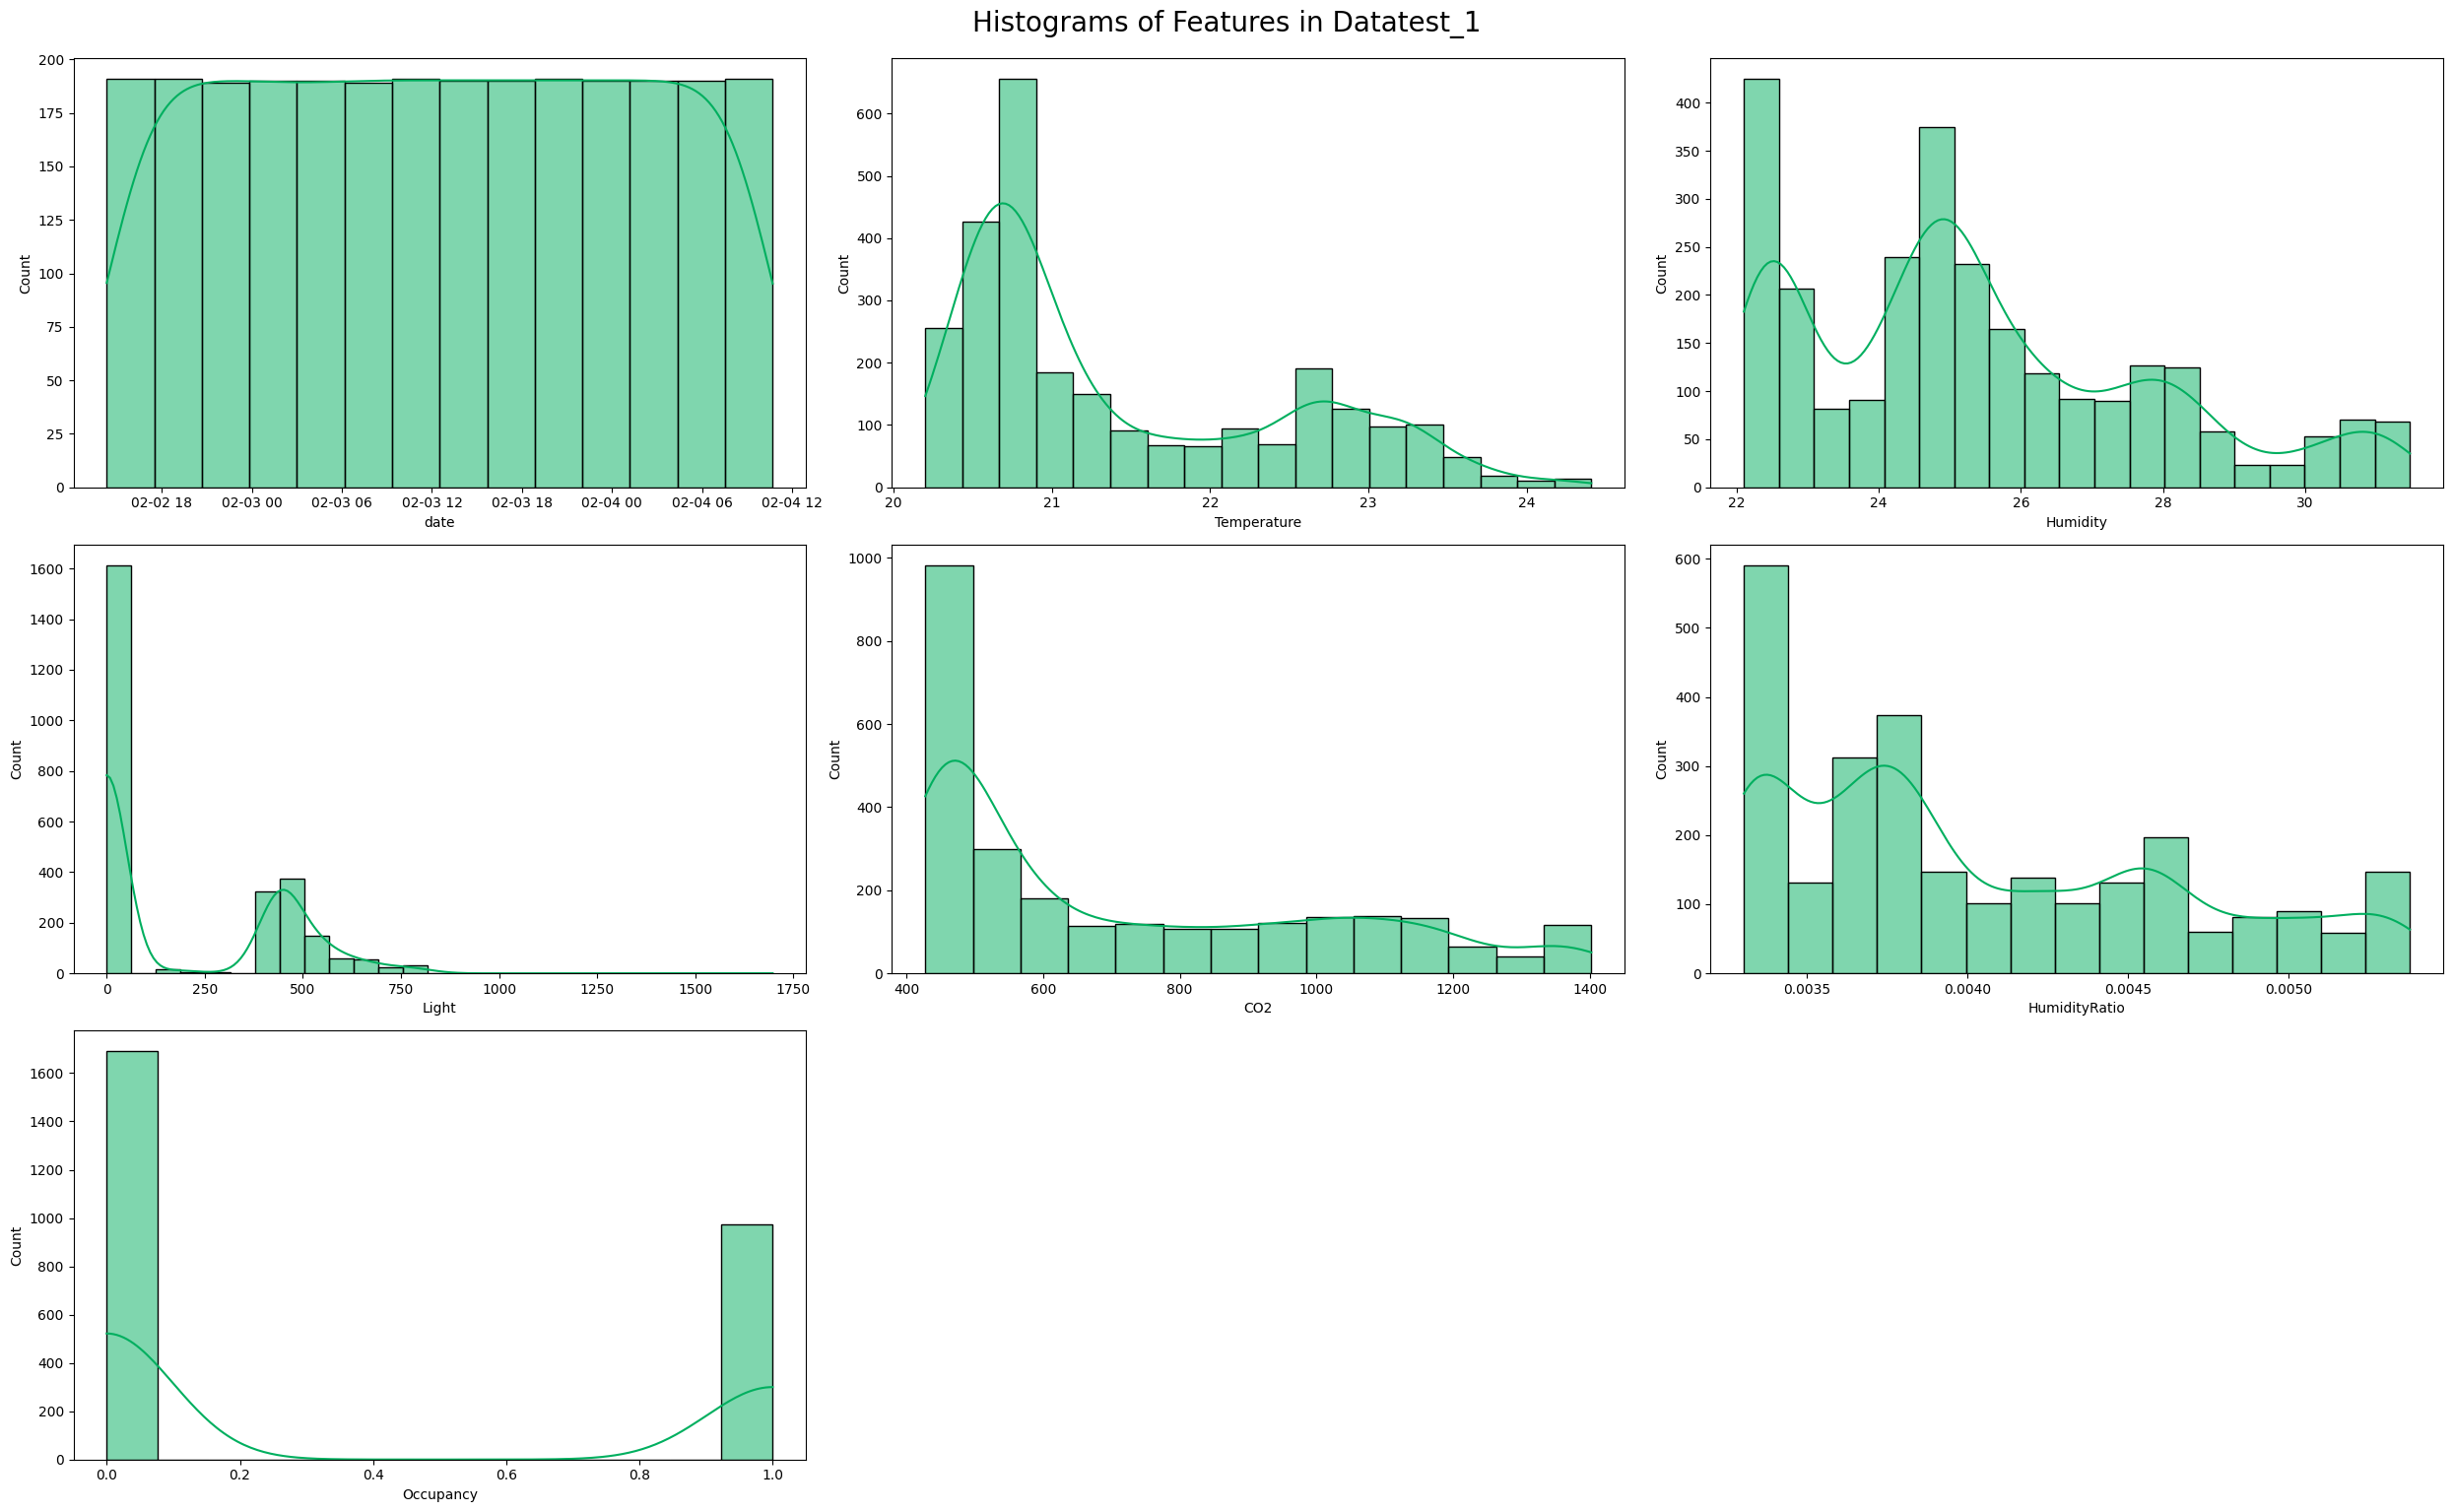

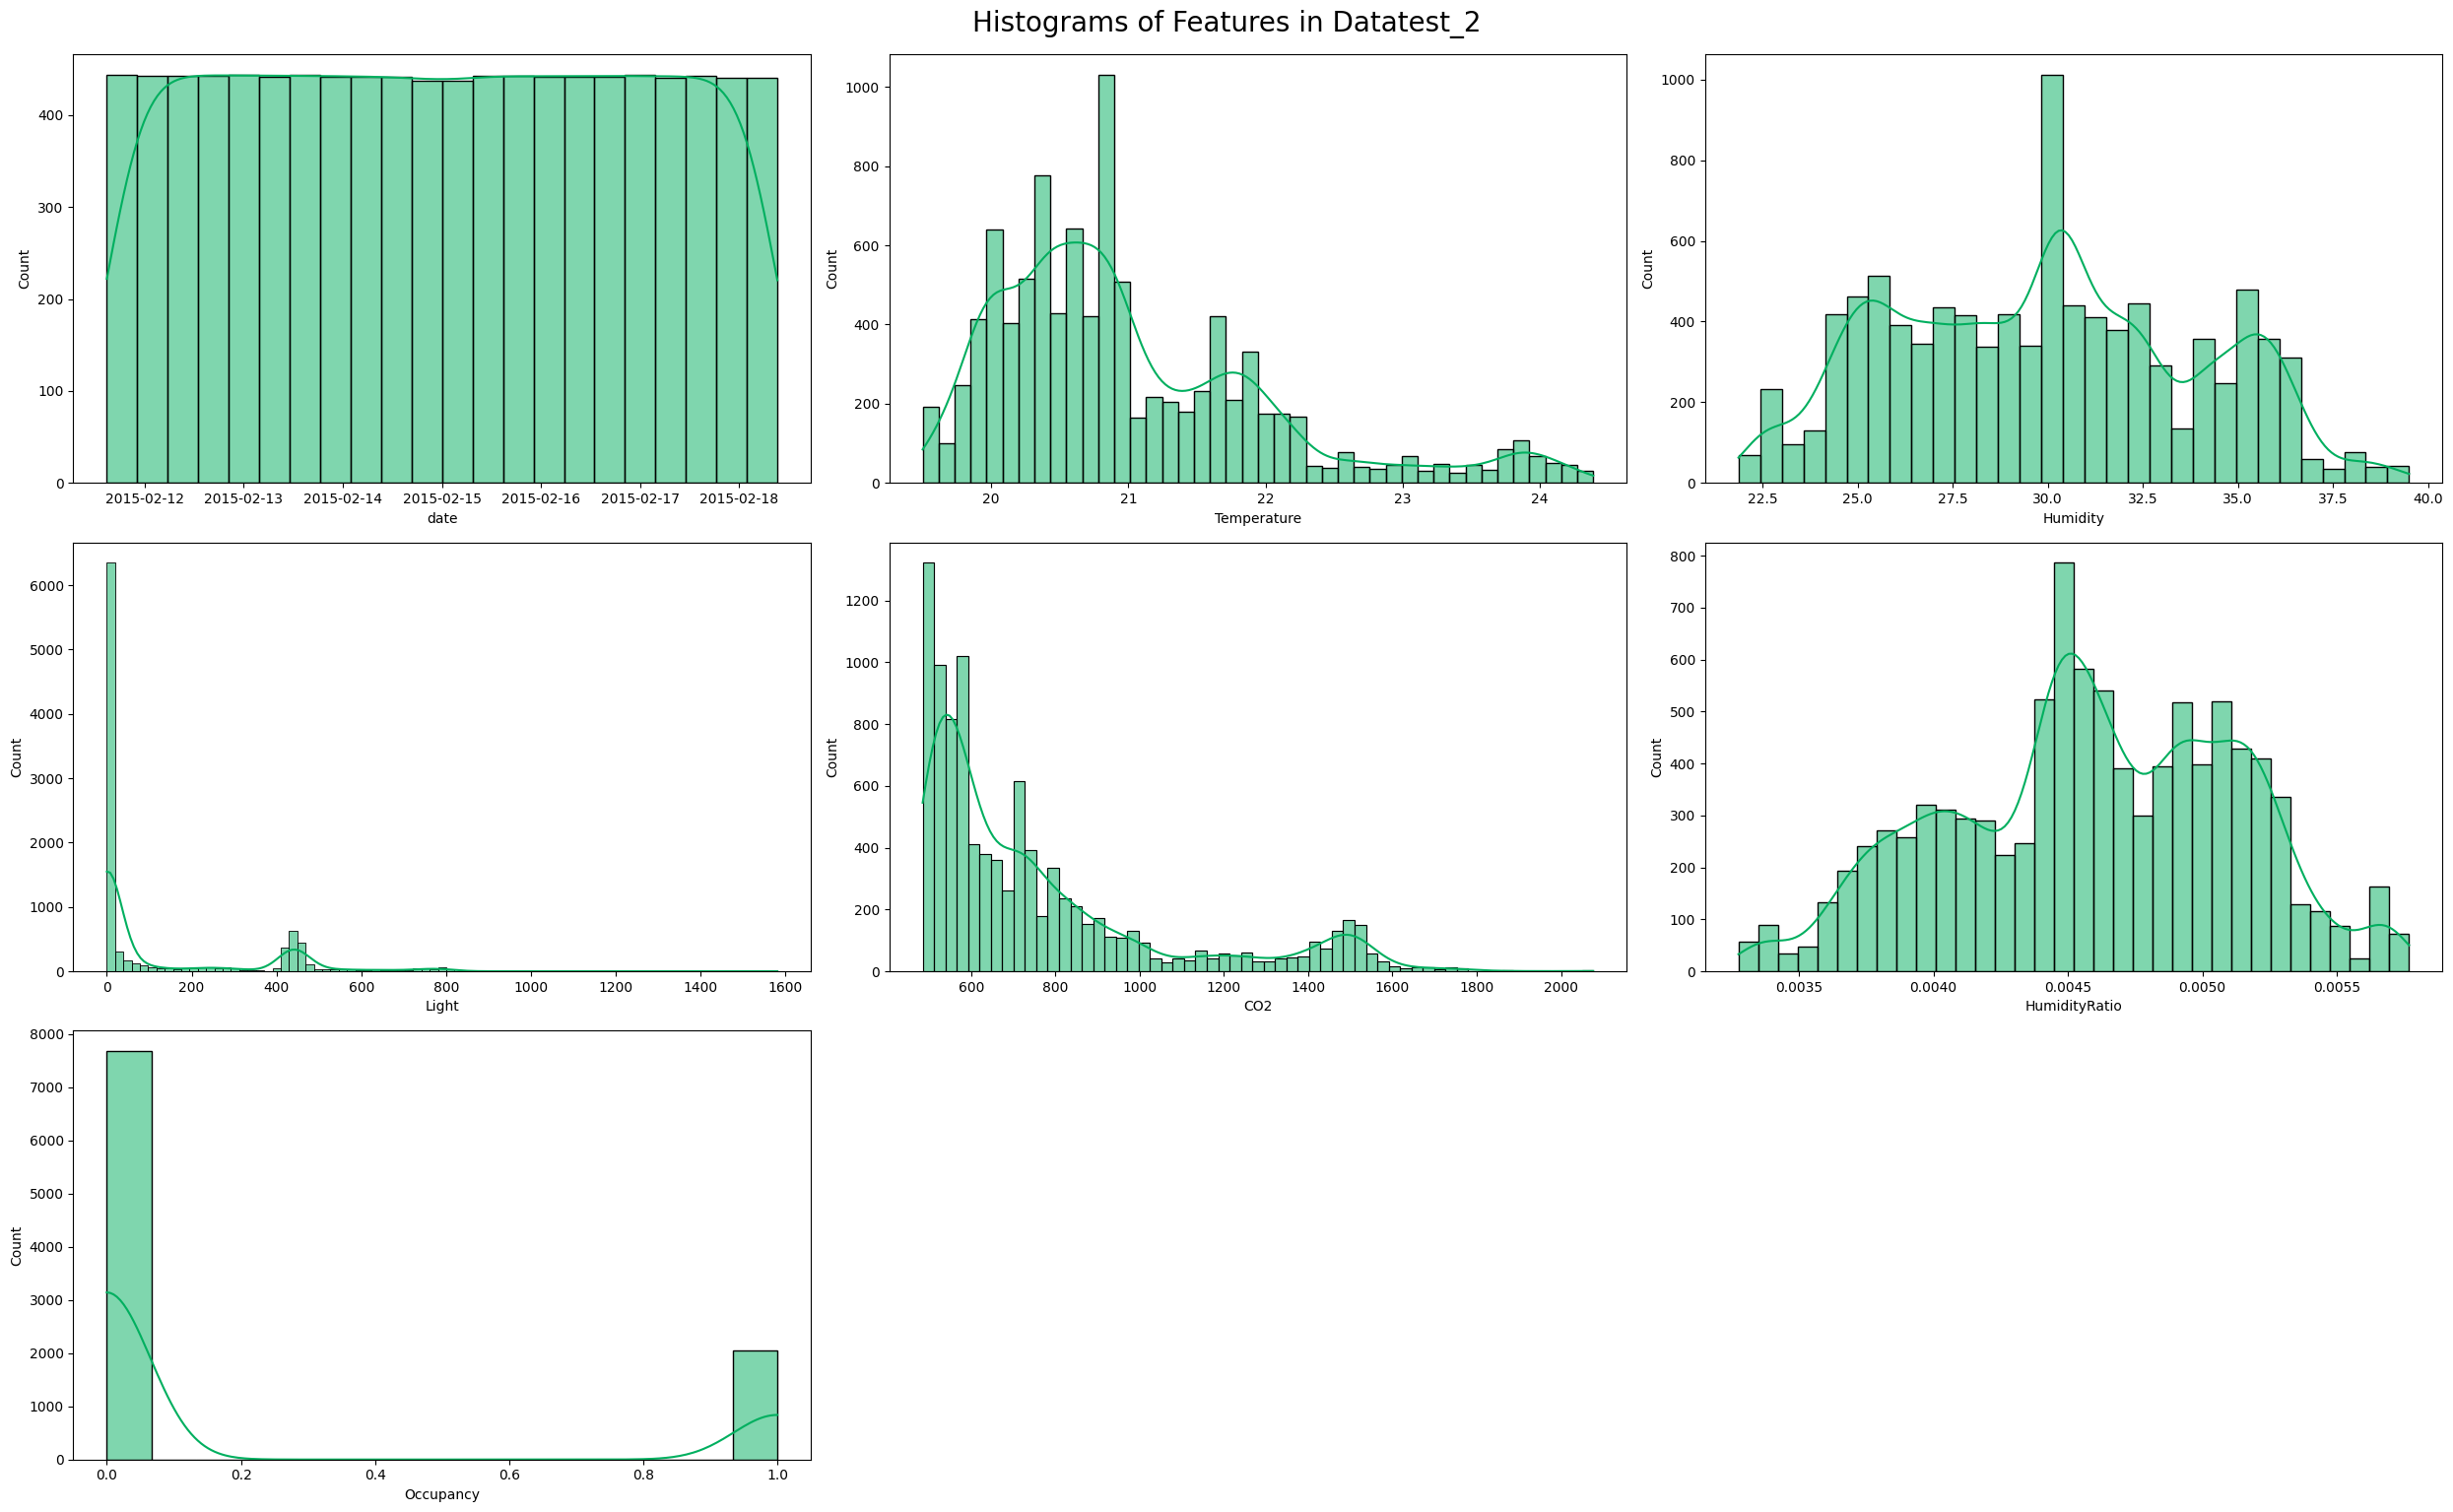

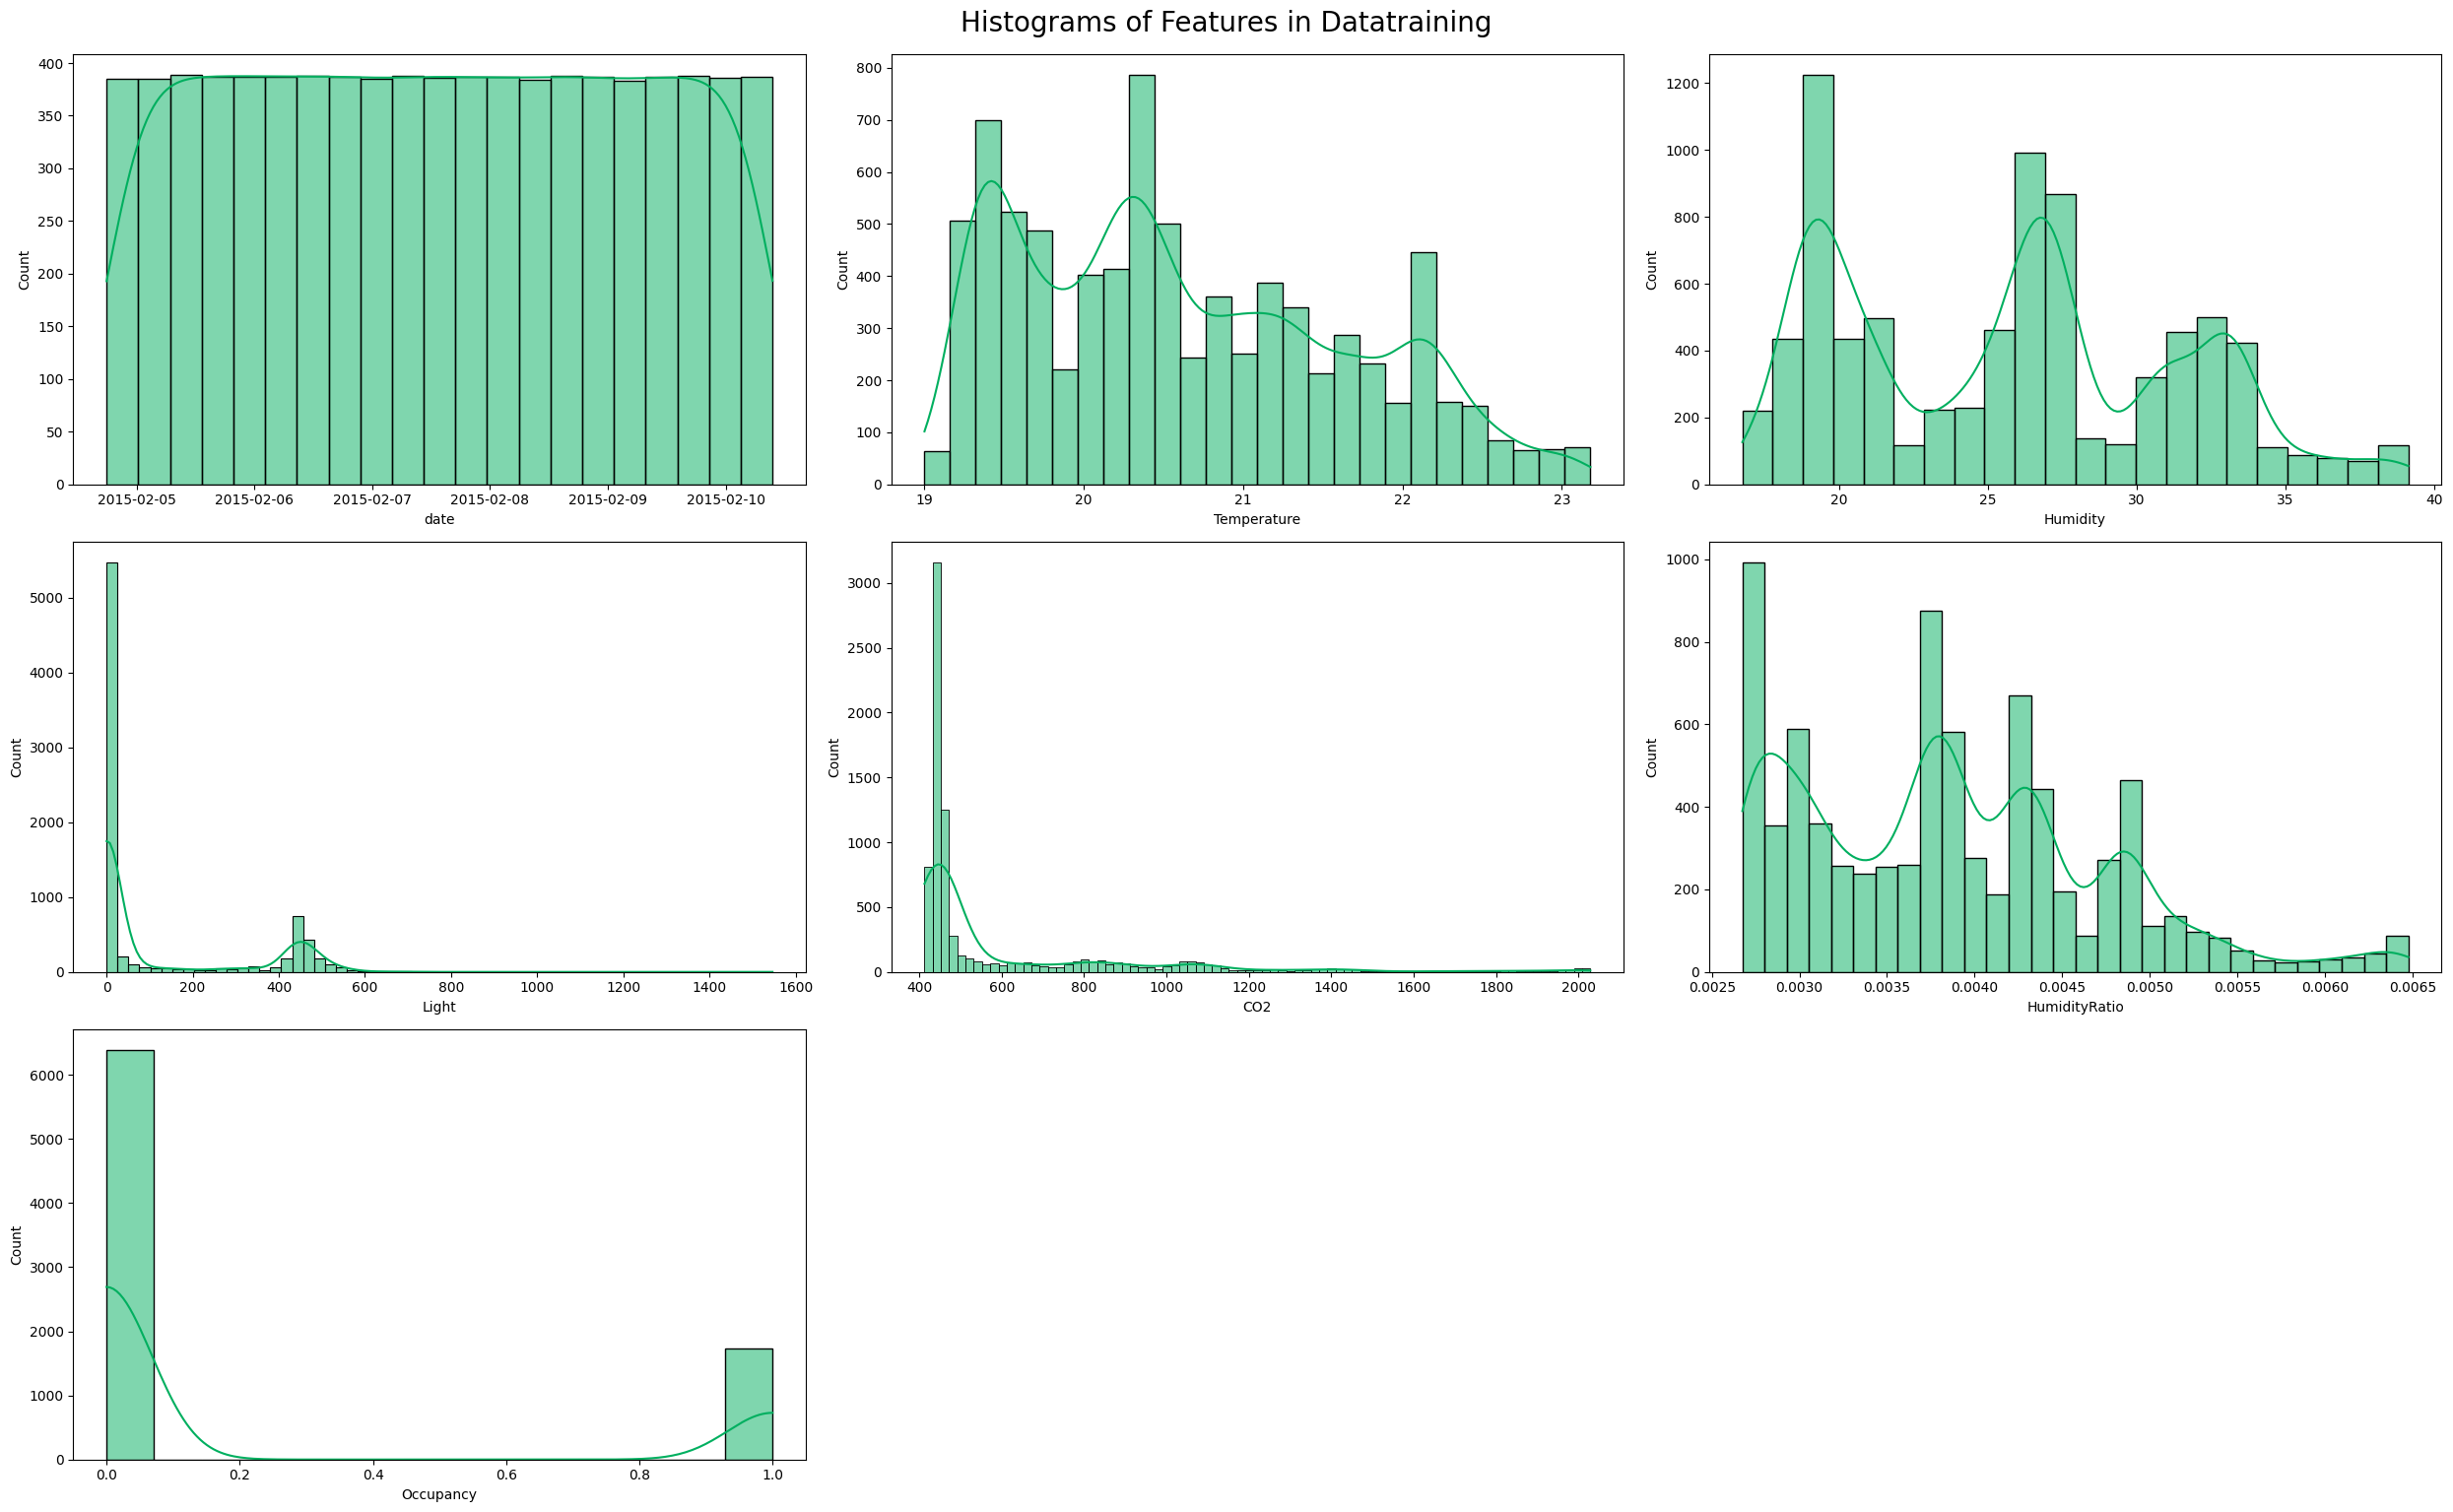

In [16]:
for name, df in datasets.items():
    plt.figure(figsize=(25, 15))
    n = 3
    for i in range(0, len(df.columns)):
        plt.subplot(n, math.ceil(len(df.columns)/n), i+1) 
        sns.histplot(df[df.columns[i]], color='#00af5f', kde=True)
        plt.tight_layout()
    plt.suptitle(f'Histograms of Features in {name}', y=1.02, size=20)

In [17]:
from scipy.stats import skew
from scipy.stats import kurtosis

for name, df in datasets.items():
    print(f"\n===== {name} =====")
    skew_type_list = []
    skew_val_list = []
    kurtosis_val_list = []

    for column in df.select_dtypes(include='number').columns:
        data = df[column].dropna(axis=0) 
        q1 = data.quantile(q=0.25)
        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode()[0]
        q3 = data.quantile(q=0.75)
        # skew_val = round(data.skew(),3)
        skew_val = round(skew(data, nan_policy="omit"),3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

        if (mean == median == mode) or (-0.2 < skew_val < 0.2):
            skew_type = "Normal Distribution (Symmetric)"
        elif mean < median < mode:
            skew_type = "Negatively Skewed"
            if skew_val <= -1:
                skew_type = "Highly Negatively Skewed"
            elif -0.5 >= skew_val > -1:
                skew_type = "Moderately Negatively Skewed"
            else :
                skew_type = "Moderately Normal Distribution (Symmetric)"
        else:
            skew_type = "Positively Skewed"
            if skew_val >= 1:
                skew_type = "Highly Positively Skewed"
            elif 0.5 <= skew_val < 1:
                skew_type = "Moderately Positively Skewed"
            else :
                skew_type = "Moderately Normal Distribution (Symmetric)"
        skew_type_list.append(skew_type)
        skew_val_list.append(skew_val)
        kurtosis_val_list.append(kurtosis_val)
                
    dist = pd.DataFrame({
        "Column Name": df.select_dtypes(include='number').columns,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "Type of Distribution": skew_type_list
    })

    # for bimodial and Uniform
    display(dist)


===== Datatest_1 =====


,Column Name,Skewness,Kurtosis,Type of Distribution
0,Temperature,0.841,-0.632,Moderately Positively Skewed
1,Humidity,0.672,-0.274,Moderately Positively Skewed
2,Light,0.758,-0.542,Moderately Positively Skewed
3,CO2,0.786,-0.729,Moderately Positively Skewed
4,HumidityRatio,0.648,-0.732,Moderately Positively Skewed
5,Occupancy,0.561,-1.685,Moderately Positively Skewed



===== Datatest_2 =====


,Column Name,Skewness,Kurtosis,Type of Distribution
0,Temperature,1.226,1.262,Highly Positively Skewed
1,Humidity,0.120,-0.849,Normal Distribution (Symmetric)
2,Light,1.508,1.216,Highly Positively Skewed
3,CO2,1.546,1.484,Highly Positively Skewed
4,HumidityRatio,-0.166,-0.610,Normal Distribution (Symmetric)
5,Occupancy,1.419,0.013,Highly Positively Skewed



===== Datatraining =====


,Column Name,Skewness,Kurtosis,Type of Distribution
0,Temperature,0.449,-0.813,Moderately Normal Distribution (Symmetric)
1,Humidity,0.273,-0.933,Moderately Normal Distribution (Symmetric)
2,Light,1.233,0.110,Highly Positively Skewed
3,CO2,2.375,5.743,Highly Positively Skewed
4,HumidityRatio,0.617,0.037,Moderately Positively Skewed
5,Occupancy,1.402,-0.034,Highly Positively Skewed


**Observation**<br>
Berdasarkan box plot, violin plot dan displot, semua data yang memiliki outlier lebih dari 5% didalamnya memiliki distribusi yang `high Skewed` beikut untuk beberapa Variable pada masing-masing dataset:

**Datatest_1**
1. **Moderately Positively Skewed**
-	`Temperature`
-	`Humidity`
-	`Light` Memiliki `0.1%` outlier
-	`CO2`
-	`HumidityRatio`

**Datatest_2**
1. **Normal Distribution**
-	`Humidity`
-	`HumidityRatio`

2. **Highly Positive Skewed**
-	`Temperature` memiliki `4%` outlier
-	`Light` memiliki `4%` outlier
-	`CO2` memiliki `10%` outlier

**Datatraining**
1. **Moderately Normal Distribution**
-	`Temperature`
-	`Humidity`

2. **Moderately Positive Skewed**
-	`HumidityRatio` memiliki `0.1%` outlier

3. **Highly Positive Skewed**
-	`Light` memiliki `0.1%` outlier
-	`CO2` memiliki `13%` outlier

**To Do**
1. Melakukan proses log transform pada data yang `Highly Positive Skewed` agar dapat menjadi normal distibution untuk model yang sensitif dengan outlier seperti Logistic `Regression`, `SVM`, `KNN` dan `Linear Model`.

### **Multivariate Analysis**

**Heatmap correlation**

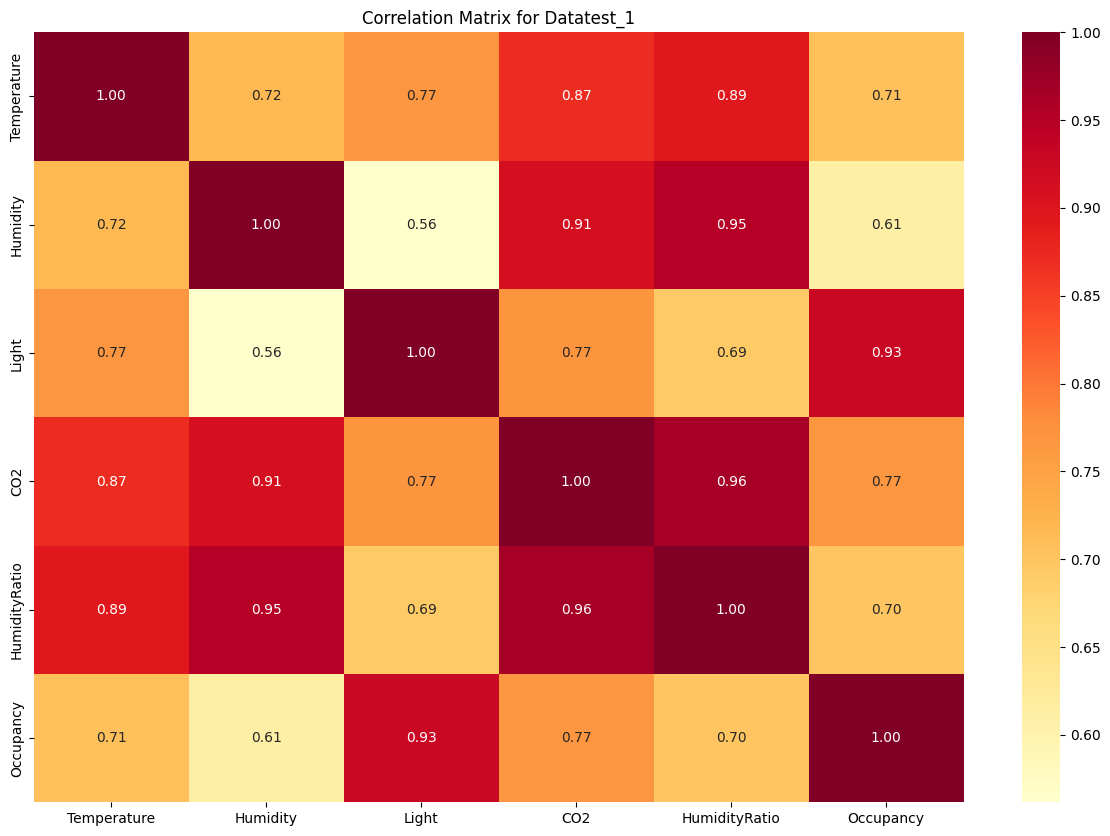

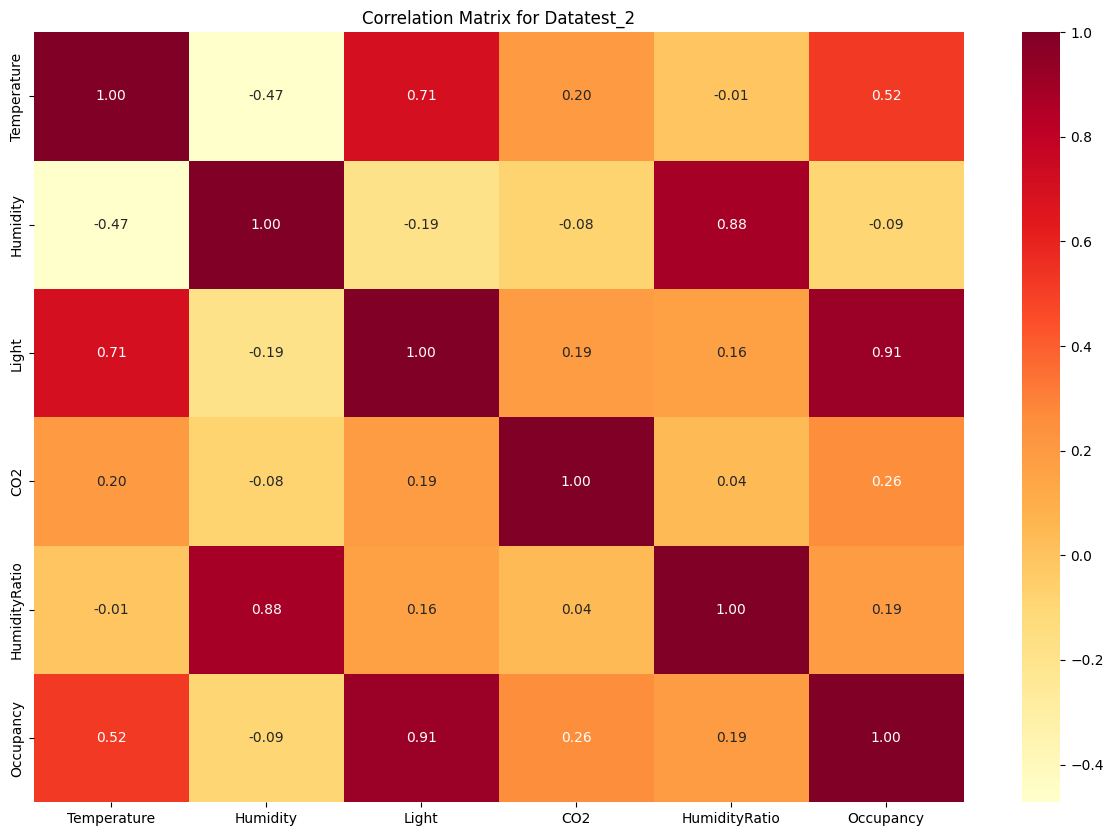

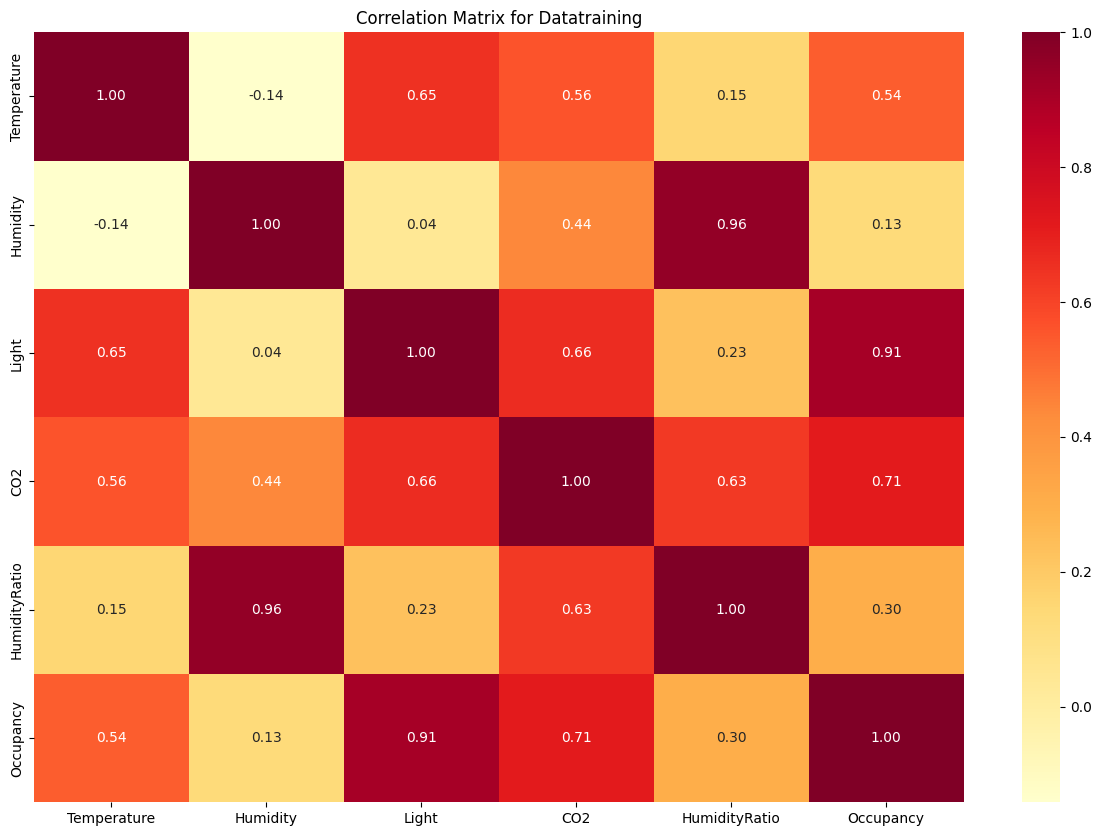

In [18]:
for name, df in datasets.items():
    plt.figure(figsize=(15,10))
    df_numeric = df.select_dtypes(include='number')
    sns.heatmap(df_numeric.corr(), cmap='YlOrRd', annot=True, fmt='.2f')
    plt.title(f'Correlation Matrix for {name}')
    plt.show()

**Check Variable Correlation with Target**

Correlation for Datatest_1:


,index,corr value,Corr Type
0,Occupancy,1.000000,Positif
1,Light,0.927917,Positif
2,CO2,0.767915,Positif
3,Temperature,0.705634,Positif
4,HumidityRatio,0.700174,Positif
5,Humidity,0.610543,Positif


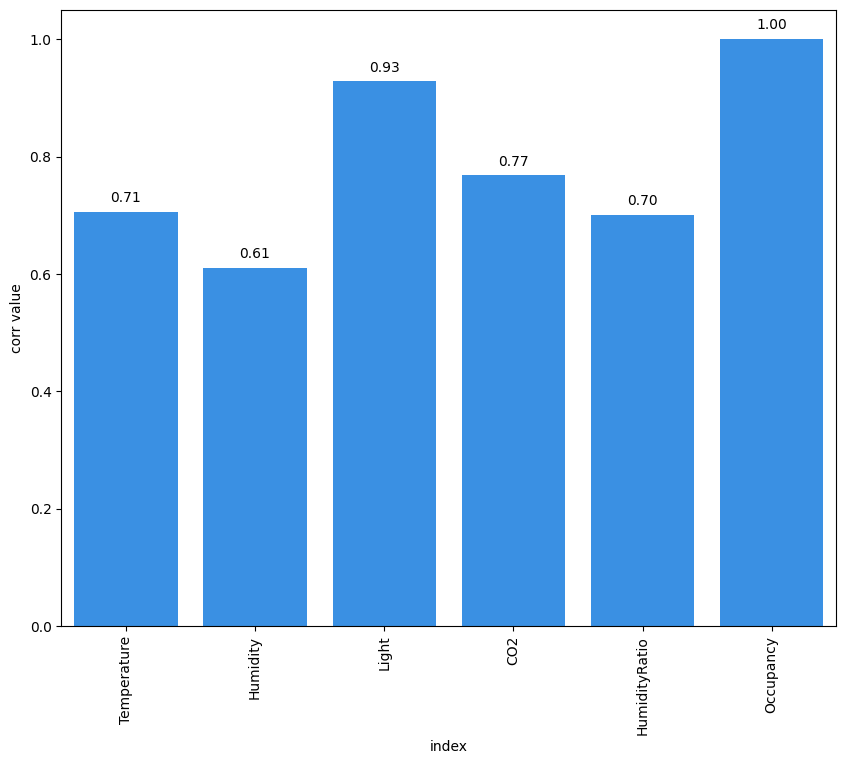

Correlation for Datatest_2:


,index,corr value,Corr Type
0,Occupancy,1.000000,Positif
1,Light,0.914461,Positif
2,Temperature,0.521501,Positif
3,CO2,0.262495,Positif
4,HumidityRatio,0.190945,Positif
5,Humidity,0.087098,Negatif


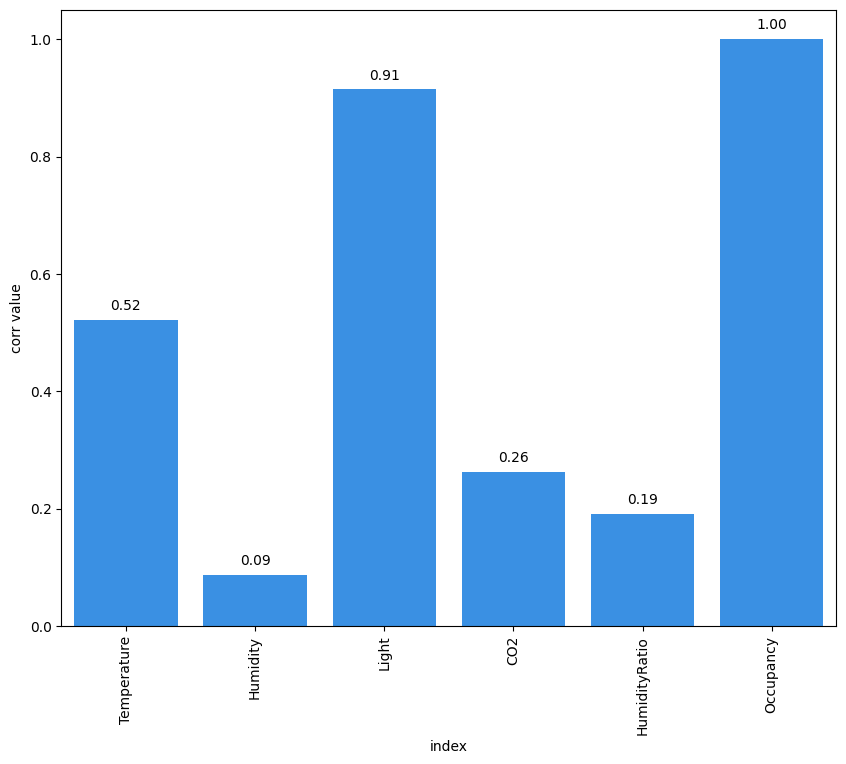

Correlation for Datatraining:


,index,corr value,Corr Type
0,Occupancy,1.000000,Positif
1,Light,0.907274,Positif
2,CO2,0.712017,Positif
3,Temperature,0.538233,Positif
4,HumidityRatio,0.300464,Positif
5,Humidity,0.133183,Positif


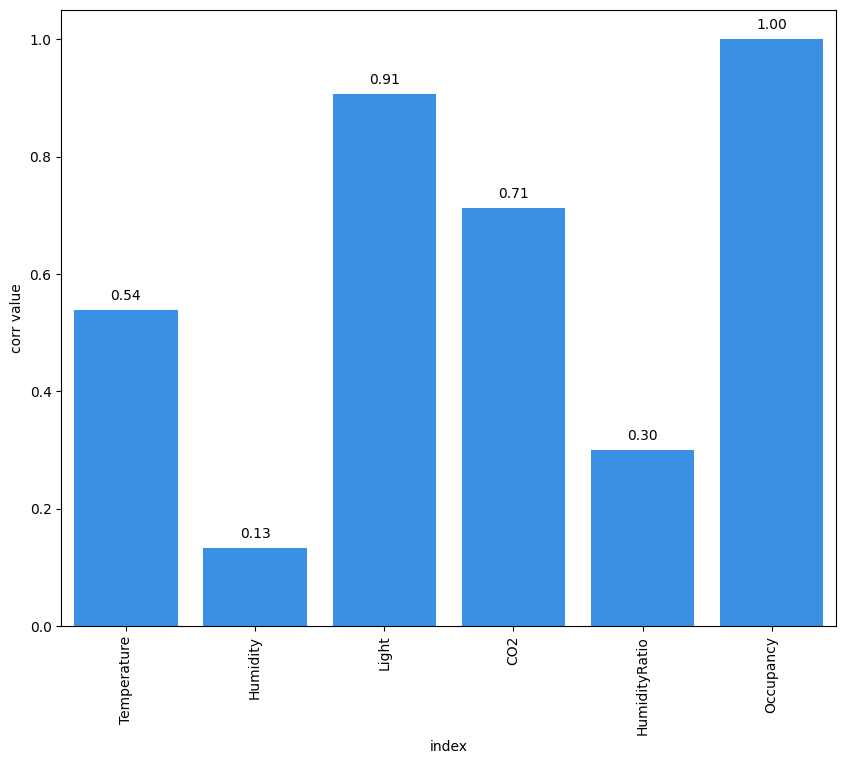

In [19]:
for name, df in datasets.items():
    df_numeric = df.select_dtypes(include='number')
    corr = df_numeric.corrwith(df_numeric["Occupancy"])
    corr = corr.reset_index(name='corr value')
    corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
    corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
    print(f"Correlation for {name}:")
    display(corr.sort_values('corr value', ascending=False, ignore_index=True))
    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():0.2f}', 
            (p.get_x() + p.get_width() / 2., p.get_height()), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 10), 
            fontsize=10,
            textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.show()

**Pairplot**

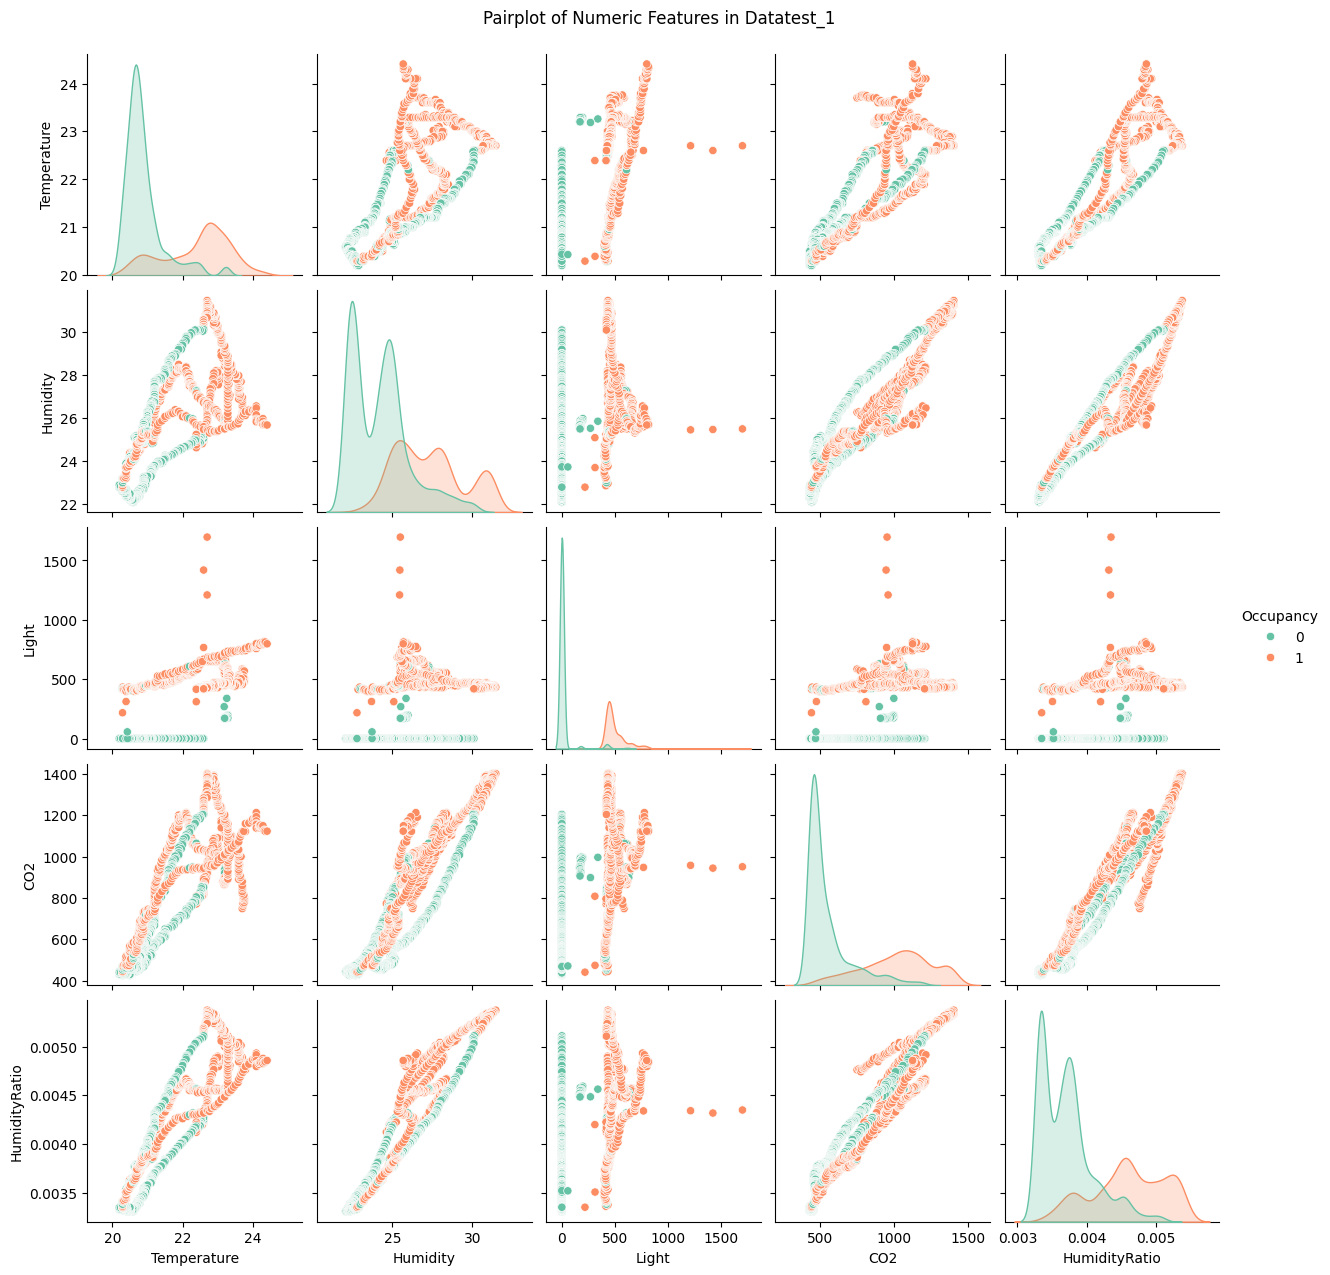

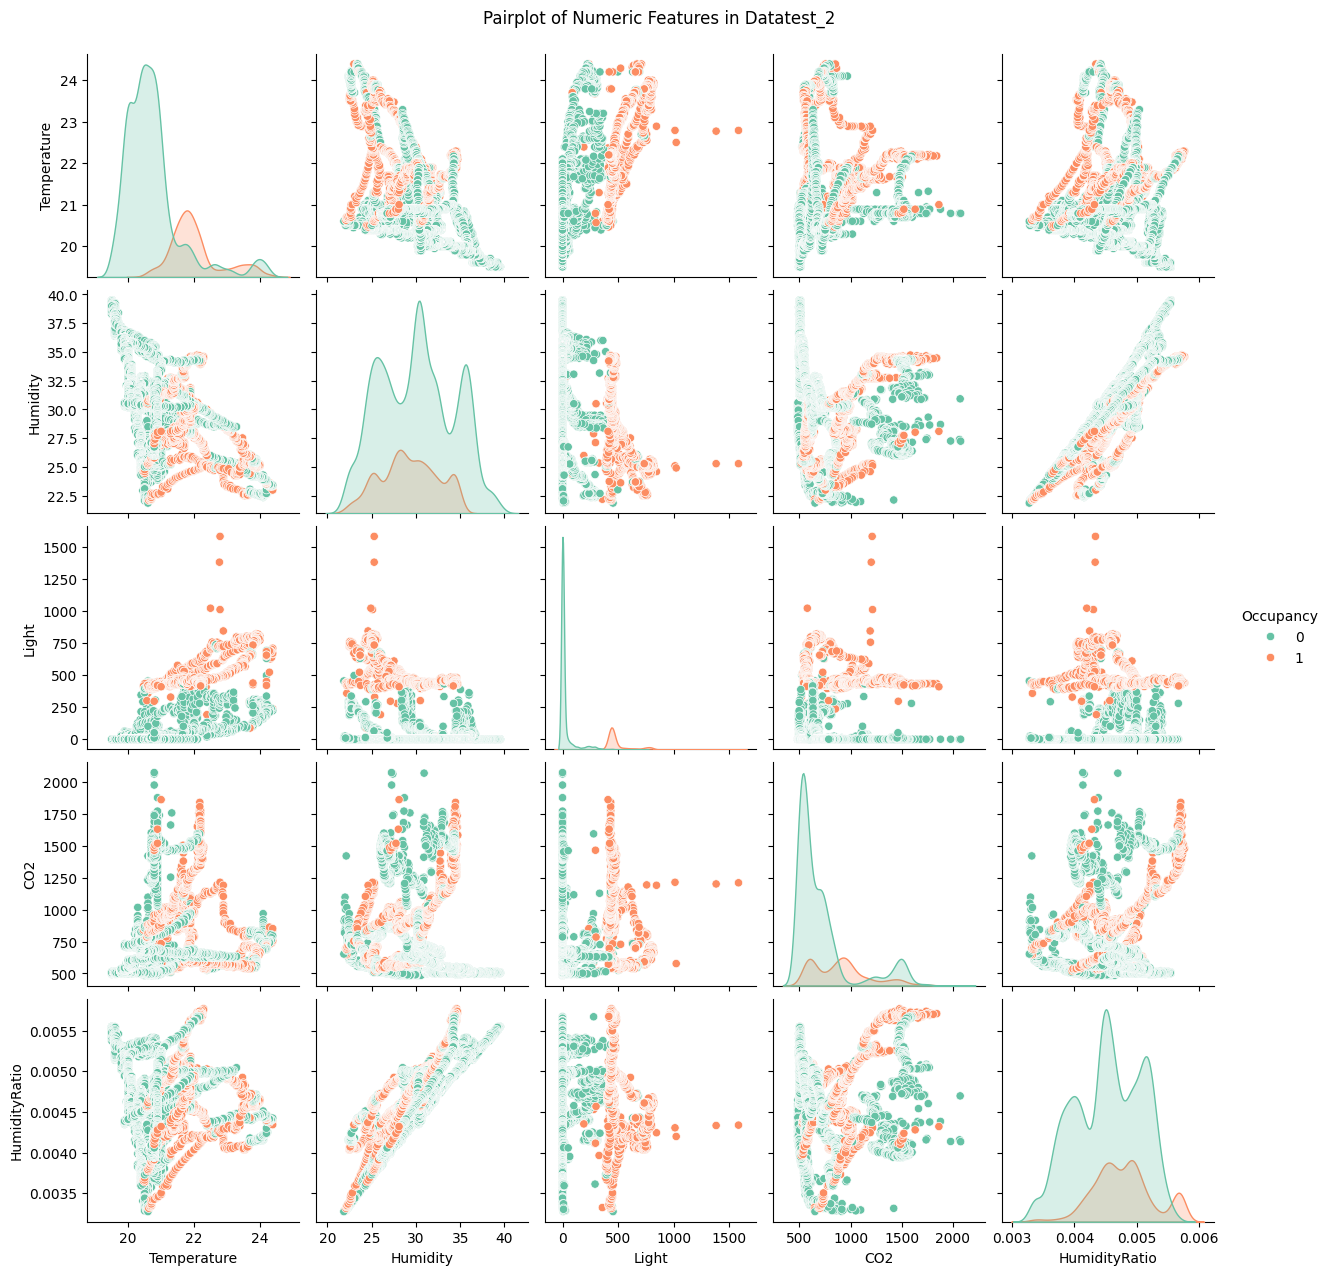

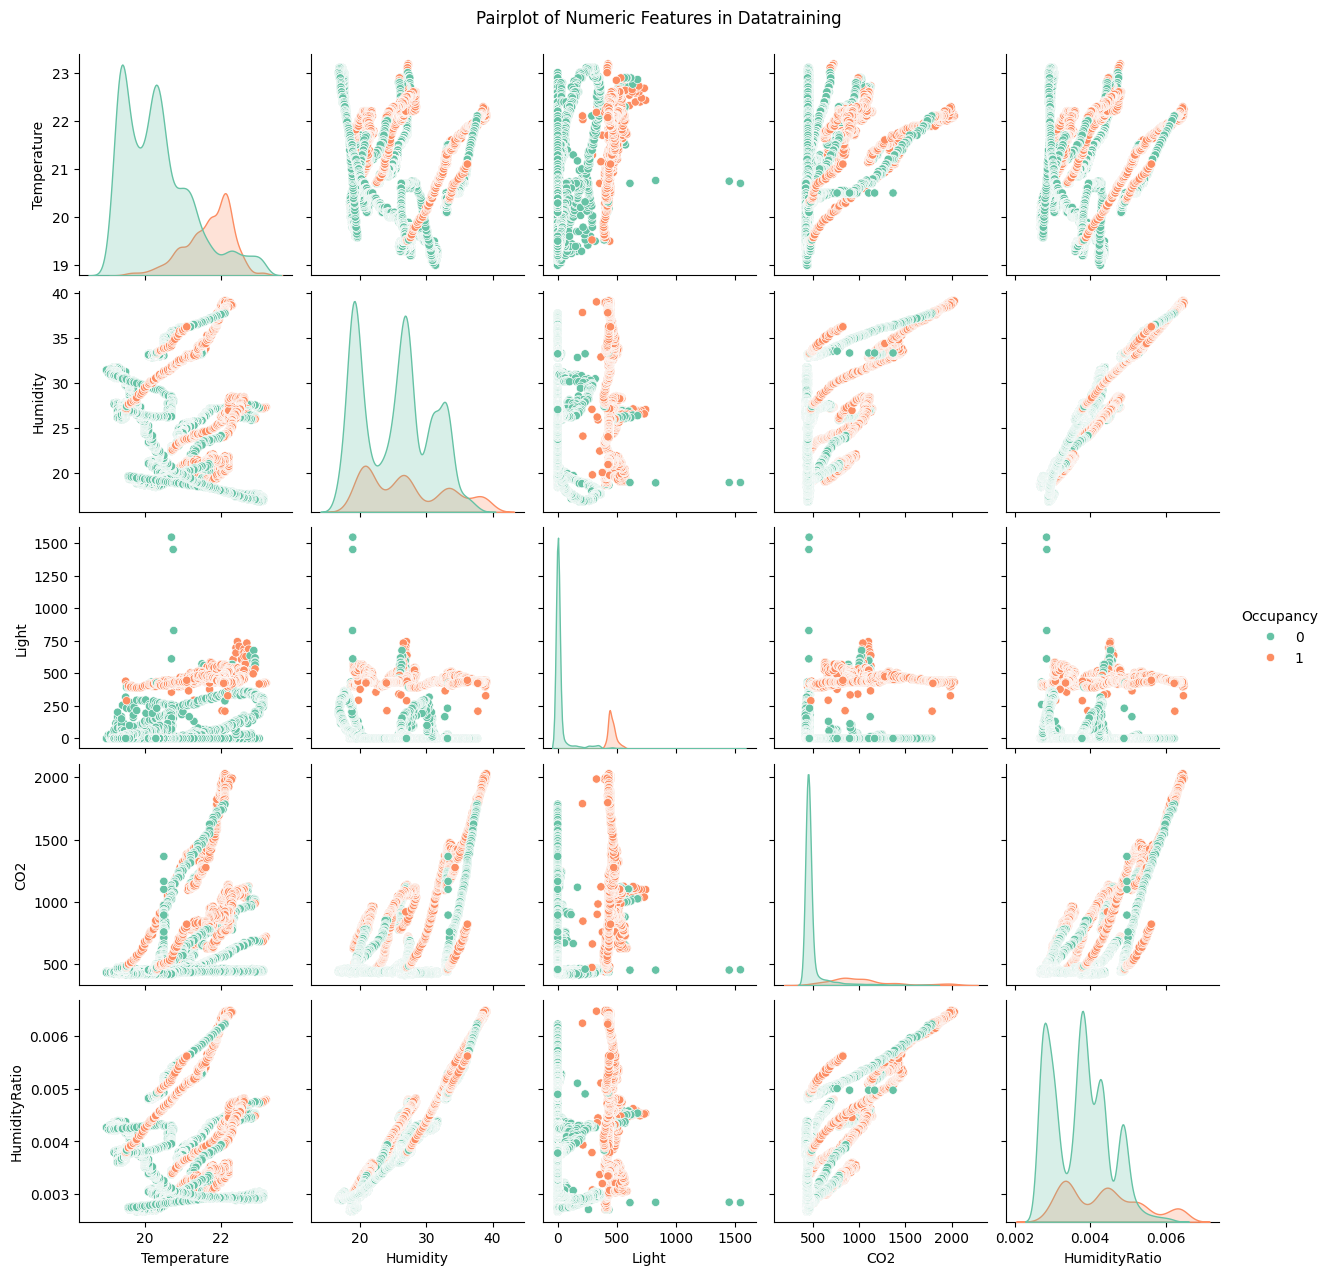

In [20]:
### Pairplot untuk melihat hubungan antar variable"
for name, df in datasets.items():
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    sns.pairplot(df[numeric_cols], hue='Occupancy', palette='Set2')
    plt.suptitle(f'Pairplot of Numeric Features in {name}', y=1.02)
    plt.show()

## **Feature Engineering_Sensor based predictor**

Selain menilai dari input sensor dan menghasilkan nilai secara absolut, kita dapat menilai perubahan yang terjadi terhadap value tersebut.

Dengan mengetahui Dynamic Behavior manusia, untuk dapat menilai occupancy dari data sensor berikut beberapa logic perubahan yang dapat terjadi:<br>
1. CO2 akan naik jika ruangan ter-occupancy.
2. Temperature akan naik dengan adanya keberadaan manusia.
3. Humidity atau kelembapan akan berubah jika terdapat manusisa yang meng-occupancy ruangan.

In [21]:
datatest_1_mark1 = datatest_1.copy()
datatest_2_mark1 = datatest_2.copy()
datatraining_mark1 = datatraining.copy()

datasets_ori_sensor = {
    "datatest_1": datatest_1_mark1,
    "datatest_2": datatest_2_mark1,
    "datatraining": datatraining_mark1
}

In [22]:
for name, df in datasets_ori_sensor.items():
    df['CO2_diff_1'] = df['CO2'].diff(1)
    df['Temp_diff_1'] = df['Temperature'].diff(1)
    df['Humidity_diff_1'] = df['Humidity'].diff(1)

Seperti pendapat sebelumnya, bahwa nilai actual saja mungkin akan noisy berbeda dengan nilai akumulasi dari beberapa kejadian dalam beberapa waktu. Dengan melihat perubahan setiap waktu maka akan mendapatkan trend perubahan dan melihat perilakunya dalam occupancy 

In [23]:
for name, df in datasets_ori_sensor.items():
    df['CO2_rolling_std'] = df['CO2'].rolling(10).std()
    df['Temp_rolling_std'] = df['Temperature'].rolling(10).std()

Seperti yang kita ketahui bahwa manusia menghasilkan CO2 secara gradual, sehingga kita bisa menambahkan fitur growth CO2

In [24]:
for name, df in datasets_ori_sensor.items():
    df['CO2_growth_rate'] = df['CO2'].pct_change()

Secara Logic jika ruangan tidak teroccupancy sensor menunjukkan keadaan dengan menujukkan nilai yang stabil sehingga dapat ditambahkan featur kestabilan sensor. dan keberadaan manusia dapat mengubah suhu dan temperature.

In [25]:
for name, df in datasets_ori_sensor.items():
    df['sensor_stability'] = (
        df['CO2'].rolling(10).std() +
        df['Temperature'].rolling(10).std()
    )

Beberapa Adjustment yang perlu dilakukan adalah sebagai berikut: <br>
1. Karena Light adalah strong predictor dan tidak secara pasif menunjukkan keberadaan occupancy (Light akan bertambah jika manusia menyalakan lampu atau membuka horden)
2. Data tidak secara konsisten merekam setiap 5 atau 10 menit, dan jika menggunakan date maka akan mempengaruhi secara date based predictor, misalnya jam kerja dan waktu weekdays dan weekend. sehingga tidak fokus kedalam sensor.

In [ ]:
# # Mengapus fitur Light dan Date
# for name, df in datasets_ori_sensor.items():
#     df.drop(columns=['Light', 'date'], inplace=True)

## **Feature Engineering With Date time exploration**

In [44]:
datatest_1_mark2 = datatest_1.copy()
datatest_2_mark2 = datatest_2.copy()
datatraining_mark2 = datatraining.copy()

datasets_timerolling = {
    "datatest_1": datatest_1_mark2,
    "datatest_2": datatest_2_mark2,
    "datatraining": datatraining_mark2
}

### **Extract date features**

In [46]:
for name, df in datasets_timerolling.items():
    df['hour'] = df['date'].dt.hour

for name, df in datasets_timerolling.items(): # Adding cyclic features for hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)

### **Extract Environmental Sensor Features**  

**Roling Statistics**

Untuk dapat menambah informasi terkait sensor feature, kita dapat melihat perubahan sensor setiap waktu, apakah berubah drastis atau stabil dan melihat perlakuan tersebut terhadap occupancy.

In [47]:
# Menjadikan index sebagai date and time untuk dapat melihat perubahan data berdasarkan waktu
for name, df in datasets_timerolling.items():
    df.set_index('date', inplace=True)

In [48]:
for name, df in datasets_timerolling.items(): # Rolling mean features with window size of 5 minutes
    df['CO2_roll_mean_15min'] = df['CO2'].rolling('15min', min_periods=1).mean()
    df['Light_roll_mean_15min'] = df['Light'].rolling('15min', min_periods=1).mean()
    df['Temp_roll_mean_15min'] = df['Temperature'].rolling('15min', min_periods=1).mean()

### **Interaction Feature**

Dalam Interaction Feature ini akan ditambahkan feature baru dengan mengabungkan beberapa feature untuk melihat interaksi feature dan pengaruhnya terhadap occupancy

**Multiplicative Interaction**

In [ ]:
# Light and CO2 interaction feature
for name, df in datasets_timerolling.items():
    df['Light_CO2_interaction'] = df['Light'] * df['CO2']

# CO2 and Temperature interaction feature
for name, df in datasets_timerolling.items():
    df['CO2_Temp_interaction'] = df['CO2'] * df['Temperature']

# light and Humidity interaction feature
for name, df in datasets_timerolling.items():
    df['Light_Humidity_interaction'] = df['Light'] * df['Humidity']

# CO2 and Humidity ratio interaction feature
for name, df in datasets_timerolling.items():
    df['CO2_HumidityRatio_interaction'] = df['CO2'] * df['HumidityRatio']

**Ratio features**

In [49]:
# CO2 / temperature ratio feature
for name, df in datasets_timerolling.items():
    df['CO2_Temp_ratio'] = df['CO2'] / (df['Temperature'] + 1e-5)

# Light / temperature ratio feature
for name, df in datasets_timerolling.items():
    df['Light_Temp_ratio'] = df['Light'] / (df['Temperature'] + 1e-5)
    
# CO2 / Humidity ratio feature
for name, df in datasets_timerolling.items():
    df['CO2_Humidity_ratio'] = df['CO2'] / (df['HumidityRatio'] + 1e-5)

## **Final Check Data**

**Missing, Infinite Values Check**

In [50]:
for name, df in datasets_timerolling.items():
    print(f"\n===== {name} =====")
    
    summary_table = pd.DataFrame({
        "Missing_Count": df.isna().sum(),
        "Missing_%": (df.isna().mean() * 100).round(2),
        "Infinite_Count": np.isinf(df).sum()
    })
    
    display(summary_table)


===== datatest_1 =====


,Missing_Count,Missing_%,Infinite_Count
Temperature,0,0.0,0
Humidity,0,0.0,0
Light,0,0.0,0
CO2,0,0.0,0
HumidityRatio,0,0.0,0
Occupancy,0,0.0,0
hour,0,0.0,0
hour_sin,0,0.0,0
hour_cos,0,0.0,0
CO2_roll_mean_15min,0,0.0,0



===== datatest_2 =====


,Missing_Count,Missing_%,Infinite_Count
Temperature,0,0.0,0
Humidity,0,0.0,0
Light,0,0.0,0
CO2,0,0.0,0
HumidityRatio,0,0.0,0
Occupancy,0,0.0,0
hour,0,0.0,0
hour_sin,0,0.0,0
hour_cos,0,0.0,0
CO2_roll_mean_15min,0,0.0,0



===== datatraining =====


,Missing_Count,Missing_%,Infinite_Count
Temperature,0,0.0,0
Humidity,0,0.0,0
Light,0,0.0,0
CO2,0,0.0,0
HumidityRatio,0,0.0,0
Occupancy,0,0.0,0
hour,0,0.0,0
hour_sin,0,0.0,0
hour_cos,0,0.0,0
CO2_roll_mean_15min,0,0.0,0


**Delete Missing Values**

In [ ]:
# datatest_1_mark1 = datatest_1_mark1.dropna()
# datatest_2_mark1 = datatest_2_mark1.dropna()
# datatraining_mark1 = datatraining_mark1.dropna()

## **Check Using Baseline Model**

Karena beberapa feature didapatkan melalui proses feature engineering, sehingga diperlukan pengechekkan pada data train apakah feature membantu dalam proses modelling atau malah memperburuk model

In [60]:
# Target variable and feature separation
from xml.parsers.expat import model


y = datatraining_mark2['Occupancy']
X = datatraining_mark2.drop(['Occupancy'], axis=1)

# Decision Tree Baseline Model
model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

model.fit(X, y)

y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6389
           1       0.98      0.99      0.99      1729

    accuracy                           0.99      8118
   macro avg       0.99      0.99      0.99      8118
weighted avg       0.99      0.99      0.99      8118



**Model Evaluation_1**

In [61]:
X_test = datatest_1_mark2.drop(['Occupancy'], axis=1)
y_test = datatest_1_mark2['Occupancy']

y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1691
           1       0.94      0.87      0.90       972

    accuracy                           0.93      2663
   macro avg       0.94      0.92      0.93      2663
weighted avg       0.93      0.93      0.93      2663



**Model Evaluation 2**

In [62]:
X_test_1 = datatest_2_mark2.drop(['Occupancy'], axis=1)
y_test_1 = datatest_2_mark2['Occupancy']

y_test_pred = model.predict(X_test_1)
print(classification_report(y_test_1, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7676
           1       0.89      0.84      0.87      2049

    accuracy                           0.95      9725
   macro avg       0.93      0.91      0.92      9725
weighted avg       0.95      0.95      0.95      9725



Sebelum menggunakan model lain, sebaiknya dilakukan proses feature importance terlebih dahulu. untuk melihat apakah feature important yang dilakukan mempengaruhi daripada model prediksi.

In [63]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

feature_importance = feature_importance.sort_values(
    by='importance',
    ascending=False
)

print(feature_importance.head(17))

                  feature  importance
12       Light_Temp_ratio    0.958742
7                hour_cos    0.014710
11         CO2_Temp_ratio    0.014164
10   Temp_roll_mean_15min    0.008146
9   Light_roll_mean_15min    0.002728
1                Humidity    0.001510
5                    hour    0.000000
4           HumidityRatio    0.000000
3                     CO2    0.000000
2                   Light    0.000000
0             Temperature    0.000000
6                hour_sin    0.000000
8     CO2_roll_mean_15min    0.000000
13     CO2_Humidity_ratio    0.000000
